<h1>Simple Dataset</h1>

<h2>Table and Contents</h2>

1. Simple Dataset
2. Transforms
3. Compose

In [1]:
import torch
from torch.utils.data import Dataset
torch.manual_seed(1)

<h2>Simple and Dataset</h2>

In [2]:
# Define class for Dataset
class toy_set(Dataset):
    def __init__(self, length = 100, transform = None):
        self.len = length
        self.x = 2 * torch.ones(length, 2)
        self.y = torch.ones(length, 1)
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample
        
    def __len__(self):
        return self.len

In [3]:
# Create Dataset object; Find out the value on index 1; Find the length of the Dataset object
our_dataset = toy_set()
print("Our toy_set object: ", our_dataset)
print("Value on index 0 of our toy_set object: ", our_dataset[0])
print("Our toy_set length: ", len(our_dataset))

Our toy_set object:  <__main__.toy_set object at 0x7fd58a1e5610>
Value on index 0 of our toy_set object:  (tensor([2., 2.]), tensor([1.]))
Our toy_set length:  100


In [4]:
# Using loop to print out the first 3 elements in dataset
for i in range(3):
    x, y = our_dataset[i]
    print("Index: ", i, "x: ", x, "y: ", y)

Index:  0 x:  tensor([2., 2.]) y:  tensor([1.])
Index:  1 x:  tensor([2., 2.]) y:  tensor([1.])
Index:  2 x:  tensor([2., 2.]) y:  tensor([1.])


In [5]:
for x,y in our_dataset:
    print(' x:', x, 'y:', y)

 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 x: tensor([2., 2.]) y: tensor([1.])
 

<h2>Transforms</h2>

You can also create a class for transforming the data. In this case, we will try to add 1 to x and multiply y by 2:

In [6]:
# Create transform class add_mult
class add_mult(object):
    def __init__(self, addx = 1, muly = 2):
        self.addx = addx
        self.muly = muly
        
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.muly
        sample = x, y
        return sample

In [7]:
# Create a add_mult transform object, and toy_set object
a_m = add_mult()
data_set = toy_set()

In [8]:
# Use loop to print out first 10 elements in dataset

for i in range(10):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = a_m(data_set[i])
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  3 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  3 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  4 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  4 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  5 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  5 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  6 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  6 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  7 Original x:  tensor([2.,

In [9]:
# Create a new data_set object with add_mult object as transform

cust_data_set = toy_set(transform = a_m)

In [10]:
# Use loop to print out first 10 elements in dataset

for i in range(10):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = cust_data_set[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  3 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  3 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  4 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  4 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  5 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  5 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  6 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  6 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  7 Original x:  tensor([2.,

<h2>Compose</h2>

You can compose multiple transforms on the dataset object. First, import <code>transforms</code> from <code>torchvision</code>:

In [11]:
from torchvision import transforms

In [12]:
# Create transform class mult
class mult(object):
    def __init__(self, mult = 100):
        self.mult = mult
        
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x * self.mult
        y = y * self.mult
        sample = x, y
        return sample

In [13]:
# Combine the add_mult() and mult()
data_transform = transforms.Compose([add_mult(), mult()])
print("The combination of transforms (Compose): ", data_transform)

The combination of transforms (Compose):  Compose(
)


The new <code>Compose</code> object will perform each transform concurrently as shown in this figure:

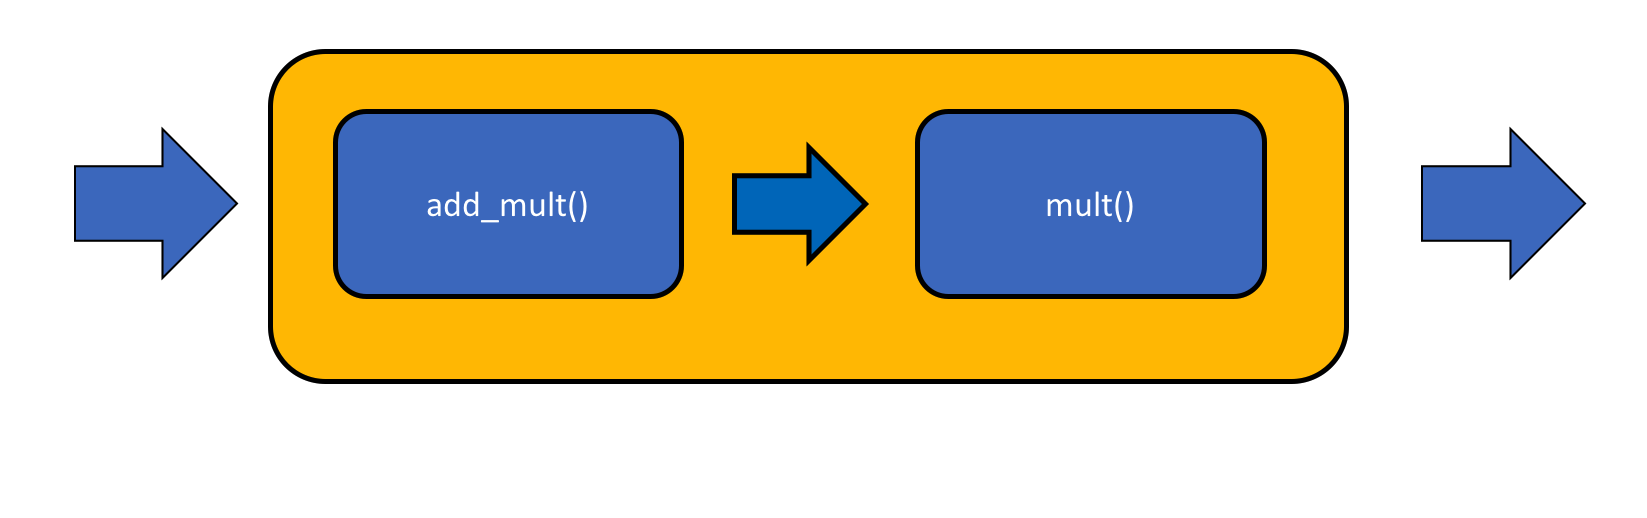

In [14]:
data_transform(data_set[0])

(tensor([300., 300.]), tensor([200.]))

In [15]:
x,y=data_set[0]
x_,y_=data_transform(data_set[0])
print( 'Original x: ', x, 'Original y: ', y)

print( 'Transformed x_:', x_, 'Transformed y_:', y_)

Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Transformed x_: tensor([300., 300.]) Transformed y_: tensor([200.])


In [16]:
# Create a new toy_set object with compose object as transform

compose_data_set = toy_set(transform = data_transform)

In [17]:
# Use loop to print out first 3 elements in dataset

for i in range(3):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = cust_data_set[i]
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)
    x_co, y_co = compose_data_set[i]
    print('Index: ', i, 'Compose Transformed x_co: ', x_co ,'Compose Transformed y_co: ',y_co)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  0 Compose Transformed x_co:  tensor([300., 300.]) Compose Transformed y_co:  tensor([200.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  1 Compose Transformed x_co:  tensor([300., 300.]) Compose Transformed y_co:  tensor([200.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  2 Compose Transformed x_co:  tensor([300., 300.]) Compose Transformed y_co:  tensor([200.])
